# Validación de modelos

* Al entrenar y evaluar modelos de ML, uno de los aspectos más importantes es **Validar** correctamente para estimar de forma fiable cómo se comportará el modelo
con datos nuevos (no visto)

Aunque la forma más básica es la separación de datos en *train* y *test* (train_test_split), existen diferentes técnicas de validación más sofisticadas que se utilizan para maximizar el uso de los datos disponibles y obtener una estimación más estable del desempeño del modelo.

La **validación cruzada** en Scikit-learn es una técnica que se utiliza para evaluar el desempeño de un modelo predictivo, dividiendo los datos en conjuntos de entrenamiento y prueba múltiples veces de manera sistemática. Esto permite obtener una estimación más confiable y robusta del rendimiento del modelo que simplemente dividir los datos una sola vez.

**Métodos para realizar validación de modelos**

1. train_test_split
2. cross_val_score
3. cross_validate
4. cross_val_predict
5. make_scorer

No devulve un modelo entrenado, devuelve los resultados de entyrenar y validar multiples veces, para que podamos evaluar un modelo de forma más fiable

**Clases para realizar distintos tipos de validación cruzada**

1. KFold
2. StratifiedKFold
3. LeaveOneOut
4. RepeatedStratifiedKFold
5. GroupKFold
6. TimeSeriesSplit


* Gracias a las repeticiones, se compensan las posibles desviaciones que puedan surgir por el reparto aleatorio de las observaciones. La diferencia entre métodos suele ser la forma en la que se generan los subconjuntos de entrenamiento/validación.




In [2]:
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X,y = load_iris(return_X_y=True) # esto nos devuelve los datos la X, y separados ya
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, y, scoring='accuracy') # por defecto cv=5 , se ha entrenado 5 veces
results

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

media 0.9733333333333334
accuracy std 0.02494438257849294


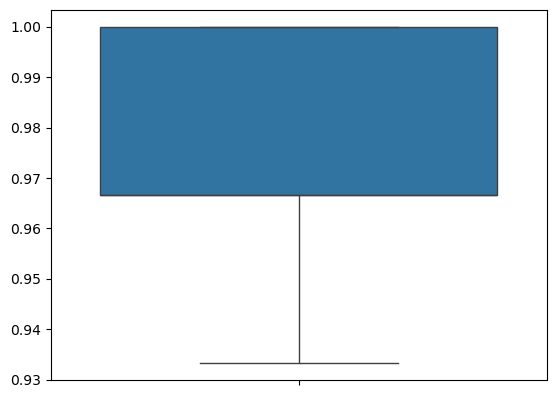

In [3]:

print('media', results.mean())
print('accuracy std', results.std()) # Importante la desviación estandar sea baja
sns.boxplot(results);


* Modificar el CV : Crear manualmente el KFold

In [4]:
from sklearn.model_selection import KFold
X,y = load_iris(return_X_y=True) # Clasificación multple, predecir la columna y
model = LogisticRegression(max_iter=500)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(model, X, y, scoring='accuracy', cv=kfold) #Entrena y valida 10 veces independiente 
print('results', results)
print('media', results.mean())
print('accuracy std', results.std())


results [1.         1.         1.         1.         1.         0.86666667
 0.93333333 1.         1.         0.93333333]
media 0.9733333333333334
accuracy std 0.04422166387140532


In [5]:
from sklearn.model_selection import StratifiedKFold
X,y = load_iris(return_X_y=True) # Clasificación multple, predecir la columna y
model = LogisticRegression(max_iter=500)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(model, X, y, scoring='accuracy', cv=kfold) #Entrena y valida 10 veces independiente 
print('results', results)
print('accuracy media', results.mean())
print('accuracy std', results.std())

results [1.         1.         1.         0.93333333 0.93333333 0.93333333
 1.         1.         0.93333333 0.93333333]
accuracy media 0.9666666666666668
accuracy std 0.033333333333333326


## Leave One Out (LOO-CV)

Caso extremo de Kfold donde K es igual al número total de muestras:

* Se deja solo una muestra para validación y se entrena con todos los demás
* Se repite para cada muestra o fila del dataset, por lo que se obtiene n estimaciones de error
* Se aprovechan los datos al máximo
* Problema: coste computacional alto ya que entrena muchas más veces
*Ideal para datasets pequeños 500 o 600 filas

In [6]:
from sklearn.model_selection import LeaveOneOut

X,y = load_iris(return_X_y=True) # Clasificación multple, predecir la columna y
model = LogisticRegression(max_iter=500)

kfold = LeaveOneOut()

results = cross_val_score(model, X, y, scoring='accuracy', cv=kfold) #Entrena y valida 10 veces independiente 
print('results', results)
print('accuracy media', results.mean())
print('accuracy std', results.std())

results [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
accuracy media 0.9666666666666667
accuracy std 0.17950549357115014


## Múltiples métricas

hacer validación cruzadas con más de una métrica

In [7]:
from sklearn.metrics import get_scorer_names
print(sorted(get_scorer_names()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'r

In [8]:
from sklearn.model_selection import cross_validate


X,y = load_iris(return_X_y=True) # Clasificación multple, predecir la columna y
model = LogisticRegression(max_iter=500)

# Usamos cross_validate en lugar de cross_val_score para poder usar múltiples métricas
results = cross_validate(model, X, y, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro', 'roc_auc_ovr']) 
results

print('accuracy ', results['test_accuracy'].mean())
print('precision ', results['test_precision_macro'].mean())
print('recall ', results['test_recall_macro'].mean())
print('f1 ', results['test_f1_macro'].mean())
print('AUC ', results['test_roc_auc_ovr'].mean())

accuracy  0.9733333333333334
precision  0.9767676767676768
recall  0.9733333333333334
f1  0.973165236323131
AUC  0.9963333333333333


# Combinar train_test_split con validación cruzada

Si no se usa train_test_split, le solemos pasar x y completas a cross_val_score

Pero cuando usamos un tyrain_test_split fuera, entonces lo habitual es pasarle x_train, y _train al cross_val_score que ya internamente este hace sus propios split de train y test y se avalua entonces la calidad total de esos datos de entrenamiento

Ya finalmente se prueba el modelo contra los datos de train_test_split que son datos que nunca vio

Prevenir data leakage ya que de esta forma el modelo no ve datos de test hasta el final del todo

In [9]:
from sklearn.metrics import accuracy_score

X,y = load_iris(return_X_y=True) # Clasificación multple, predecir la columna y
model = LogisticRegression(max_iter=500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

print('accuracy', results.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('accuracy test', accuracy_score(y_test, y_pred))

accuracy 0.95
accuracy test 1.0


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


import pandas as pd

df = pd.read_csv('../Data/titanic_preprocesamiento.csv')
X = df.drop(columns= ['Survived'])
y = df['Survived']

models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'SVC': SVC(probability=True),
    'RandomForest': RandomForestClassifier()
}

df_list = []
for name, model in models.items(): 
    
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr'])
    df_model = pd.DataFrame(results)
    df_model['modelo'] = name
    df_list.append(df_model)
df_resultados = pd.concat(df_list, ignore_index=True)


##  Validación cruzada con múltiples modelos

*Bucle para probar todos los modelos con cross_validate probando múltiples métricas.

In [32]:
df_resultados.head(2)

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,test_roc_auc_ovr,modelo
0,0.079536,0.024119,0.784091,0.773534,0.773534,0.773534,0.834620,LogisticRegression
1,0.095860,0.020317,0.822857,0.815035,0.809579,0.812030,0.858851,LogisticRegression


In [33]:
df_pivot = df_resultados.groupby('modelo').mean().sort_values('test_f1_macro', ascending=False)
df_pivot

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,test_roc_auc_ovr
modelo,,,,,,,
RandomForest,0.259560,0.032591,0.817357,0.811207,0.801002,0.804970,0.876577
LogisticRegression,0.091429,0.023255,0.802532,0.795459,0.786730,0.789618,0.856245
DT,0.006060,0.017294,0.783136,0.772743,0.772986,0.772363,0.773371
KNN,0.005558,0.045330,0.776318,0.768159,0.753677,0.758768,0.809282
SVC,0.163194,0.045567,0.696370,0.757081,0.620588,0.604430,0.822302


<Axes: ylabel='modelo'>

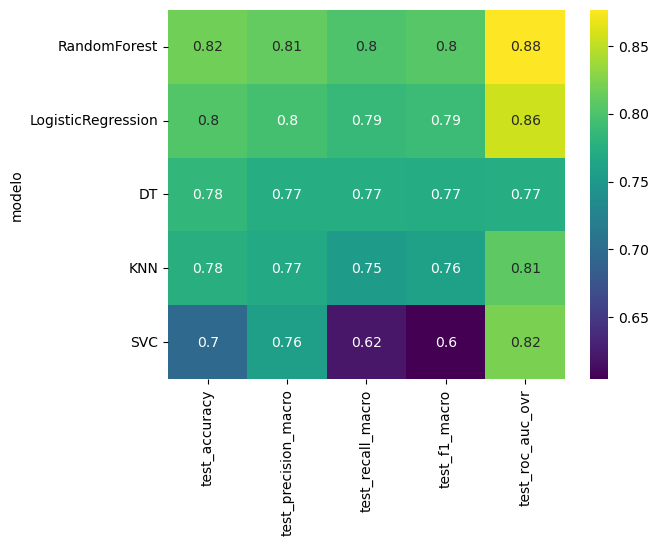

In [34]:
sns.heatmap(df_pivot.drop(columns=['fit_time','score_time']), annot=True, cmap='viridis')

In [35]:
# dividir en dos dataframes, unos para times y otro para scores
df_resultados_times = df_resultados[['modelo', 'fit_time', 'score_time']]
df_resultados_scores = df_resultados[['modelo', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_macro', 'test_roc_auc_ovr']]

In [36]:
 # DATAFRAMES DE TIMES
df_times = df_resultados_times.melt(id_vars='modelo', var_name='time_type', value_name='time_seconds')
df_times.head(3)

,modelo,time_type,time_seconds
0,LogisticRegression,fit_time,0.079536
1,LogisticRegression,fit_time,0.095860
2,LogisticRegression,fit_time,0.119276


In [37]:
# DATAFRAMES DE SCORES
df_scores = df_resultados_scores.melt(id_vars='modelo', var_name='metric', value_name='score')
df_scores.head(3)

,modelo,metric,score
0,LogisticRegression,test_accuracy,0.784091
1,LogisticRegression,test_accuracy,0.822857
2,LogisticRegression,test_accuracy,0.788571


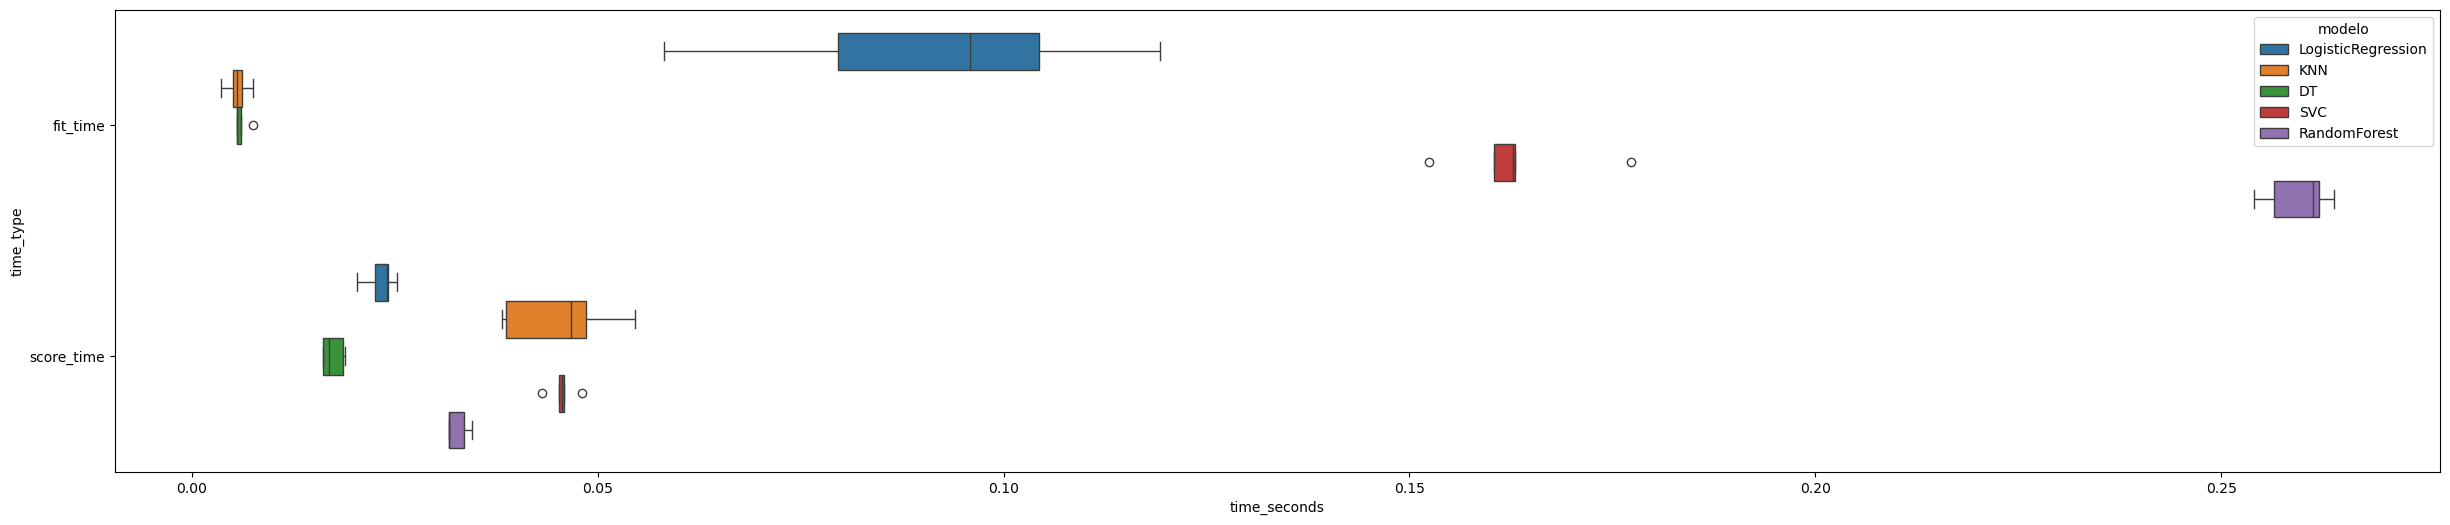

In [38]:
 # BOXPLOT PARA TIMES
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
sns.boxplot(df_times, x='time_seconds', y='time_type', hue='modelo');

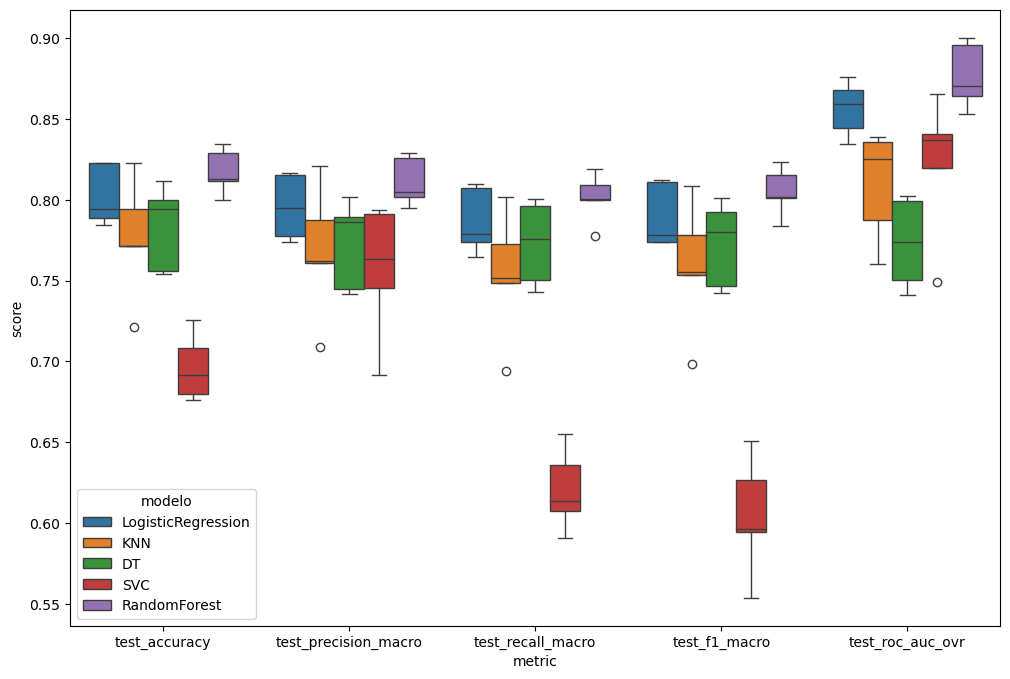

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(df_scores, x='metric', y='score', hue='modelo');

Se observa que el modelo RandomForest es el modelo con mejores resultados, se puede optar por entrenar ese modelo con todos los datos y exportarlo y desplegarlo a un sistema en producción utilizando MLOps, DevOps....

NOTA: Hay que tener en cuenta, que los modelos no se han optimizado sus parámetros, si los optimizamos podemos lograr mayor precisión antes de decidir entrenarlo finalmente

NOTA: A nivel de negocio hay que ver si sel modelo cumple cobn los requisitos de tolerancia de error y precisión. Como es un proceso iterativo, se sigue iterando mejorando los datos, preprocesados, modelos, evaluaciones

## Validación cruzada regresión

In [29]:
print(sorted(get_scorer_names()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'r

In [31]:
from sklearn.linear_model import LinearRegression

df = sns.load_dataset('mpg').dropna()
X = df[['horsepower', 'weight', 'cylinders', 'acceleration']]
y = df['mpg']

model = LinearRegression()
results = cross_validate(model, X, y,
                         scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error']
)

print('fit_time', results['fit_time'].mean())
print('score_time', results['score_time'].mean())
print('test_r2', results['test_r2'].mean())
print('test_neg_mean_absolute_error', results['test_neg_mean_absolute_error'].mean())
print('test_neg_mean_squared_error', results['test_neg_mean_squared_error'].mean())
print('test_neg_mean_absolute_percentage_error', results['test_neg_mean_absolute_percentage_error'].mean())
print('test_neg_root_mean_squared_error', results['test_neg_root_mean_squared_error'].mean())

fit_time 0.0441469669342041
score_time 0.013098955154418945
test_r2 0.328911477395441
test_neg_mean_absolute_error -3.824073975303061
test_neg_mean_squared_error -24.47913086643998
test_neg_mean_absolute_percentage_error -0.16461471124928923
test_neg_root_mean_squared_error -4.676293792335127
